In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

In [41]:
path_datasets = 'datasets/'

In [42]:
df1 = pd.read_csv(path_datasets + 'ti-corruption-perception-index.csv')
df2 = pd.read_csv(path_datasets + 'human-development-index.csv')
df3 = pd.read_csv(path_datasets + 'political-corruption-index.csv')
df4 = pd.read_csv(path_datasets + 'gdp-per-capita-worldbank.csv')
df1

,Entity,Code,Year,Corruption Perceptions Index
0,Afghanistan,AFG,2012,8
1,Afghanistan,AFG,2013,8
2,Afghanistan,AFG,2014,12
3,Afghanistan,AFG,2015,11
4,Afghanistan,AFG,2016,15
...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24
2308,Zimbabwe,ZWE,2021,23
2309,Zimbabwe,ZWE,2022,23
2310,Zimbabwe,ZWE,2023,24


In [43]:
df_final = df1.merge(df2, on=['Entity', 'Code', 'Year'], how='left')
df_final

,Entity,Code,Year,Corruption Perceptions Index,Human Development Index
0,Afghanistan,AFG,2012,8,0.484
1,Afghanistan,AFG,2013,8,0.492
2,Afghanistan,AFG,2014,12,0.497
3,Afghanistan,AFG,2015,11,0.496
4,Afghanistan,AFG,2016,15,0.495
...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.582
2308,Zimbabwe,ZWE,2021,23,0.581
2309,Zimbabwe,ZWE,2022,23,0.594
2310,Zimbabwe,ZWE,2023,24,0.598


In [44]:
df_final = df_final.merge(df3, on=['Entity', 'Code', 'Year'], how='left')
df_final

,Entity,Code,Year,Corruption Perceptions Index,Human Development Index,Political corruption index (central estimate)
0,Afghanistan,AFG,2012,8,0.484,0.961
1,Afghanistan,AFG,2013,8,0.492,0.941
2,Afghanistan,AFG,2014,12,0.497,0.927
3,Afghanistan,AFG,2015,11,0.496,0.904
4,Afghanistan,AFG,2016,15,0.495,0.905
...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.582,0.795
2308,Zimbabwe,ZWE,2021,23,0.581,0.826
2309,Zimbabwe,ZWE,2022,23,0.594,0.806
2310,Zimbabwe,ZWE,2023,24,0.598,0.862


In [45]:
df_final = df_final.merge(df4, on=['Entity', 'Code', 'Year'], how='left')
df_final

,Entity,Code,Year,Corruption Perceptions Index,Human Development Index,Political corruption index (central estimate),"GDP per capita, PPP (constant 2021 international $)"
0,Afghanistan,AFG,2012,8,0.484,0.961,2985.3190
1,Afghanistan,AFG,2013,8,0.492,0.941,3046.5798
2,Afghanistan,AFG,2014,12,0.497,0.927,3017.9426
3,Afghanistan,AFG,2015,11,0.496,0.904,2967.6921
4,Afghanistan,AFG,2016,15,0.495,0.905,2958.7854
...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.582,0.795,2987.2698
2308,Zimbabwe,ZWE,2021,23,0.581,0.826,3184.7854
2309,Zimbabwe,ZWE,2022,23,0.594,0.806,3323.1218
2310,Zimbabwe,ZWE,2023,24,0.598,0.862,3442.2512


In [46]:
df_final.describe

<bound method NDFrame.describe of            Entity Code  Year  Corruption Perceptions Index  \
0     Afghanistan  AFG  2012                             8   
1     Afghanistan  AFG  2013                             8   
2     Afghanistan  AFG  2014                            12   
3     Afghanistan  AFG  2015                            11   
4     Afghanistan  AFG  2016                            15   
...           ...  ...   ...                           ...   
2307     Zimbabwe  ZWE  2020                            24   
2308     Zimbabwe  ZWE  2021                            23   
2309     Zimbabwe  ZWE  2022                            23   
2310     Zimbabwe  ZWE  2023                            24   
2311     Zimbabwe  ZWE  2024                            21   

      Human Development Index  Political corruption index (central estimate)  \
0                       0.484                                          0.961   
1                       0.492                                

## Nettoyage et transformation

1. Renommer les colonnes (pour avoir des noms simples)

In [47]:
df_final.rename(columns={
    'Corruption Perceptions Index': 'corruption_index',
    'Human Development Index': 'hdi',
    'Political corruption index (central estimate)': 'political_corruption_index',
    'GDP per capita, PPP (constant 2021 international $)': 'gdp_per_capita'
}, inplace=True)

In [48]:
df_final

,Entity,Code,Year,corruption_index,hdi,political_corruption_index,gdp_per_capita
0,Afghanistan,AFG,2012,8,0.484,0.961,2985.3190
1,Afghanistan,AFG,2013,8,0.492,0.941,3046.5798
2,Afghanistan,AFG,2014,12,0.497,0.927,3017.9426
3,Afghanistan,AFG,2015,11,0.496,0.904,2967.6921
4,Afghanistan,AFG,2016,15,0.495,0.905,2958.7854
...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.582,0.795,2987.2698
2308,Zimbabwe,ZWE,2021,23,0.581,0.826,3184.7854
2309,Zimbabwe,ZWE,2022,23,0.594,0.806,3323.1218
2310,Zimbabwe,ZWE,2023,24,0.598,0.862,3442.2512


2. Supprimer les lignes avec des données critiques manquantes

In [49]:
df_clean = df_final.dropna(subset=['corruption_index', 'gdp_per_capita'])

In [50]:
df_clean

,Entity,Code,Year,corruption_index,hdi,political_corruption_index,gdp_per_capita
0,Afghanistan,AFG,2012,8,0.484,0.961,2985.3190
1,Afghanistan,AFG,2013,8,0.492,0.941,3046.5798
2,Afghanistan,AFG,2014,12,0.497,0.927,3017.9426
3,Afghanistan,AFG,2015,11,0.496,0.904,2967.6921
4,Afghanistan,AFG,2016,15,0.495,0.905,2958.7854
...,...,...,...,...,...,...,...
2306,Zimbabwe,ZWE,2019,24,0.584,0.765,3294.8062
2307,Zimbabwe,ZWE,2020,24,0.582,0.795,2987.2698
2308,Zimbabwe,ZWE,2021,23,0.581,0.826,3184.7854
2309,Zimbabwe,ZWE,2022,23,0.594,0.806,3323.1218


3. Appliquer une transformation log sur le PIB

* les valeurs PIB varient énormément cela peut fausser les corrélations et aplatir les petits pays dans les graphiques
* Le logarithme ramène tout à une échelle plus "compressée", en respectant l’ordre. 

In [51]:
df_clean['log_gdp_per_capita'] = np.log(df_clean['gdp_per_capita'])

/var/folders/40/z21v_lnd0q15_q7p4pqzv2740000gn/T/ipykernel_91317/1921568117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_gdp_per_capita'] = np.log(df_clean['gdp_per_capita'])


In [52]:
df_clean

,Entity,Code,Year,corruption_index,hdi,political_corruption_index,gdp_per_capita,log_gdp_per_capita
0,Afghanistan,AFG,2012,8,0.484,0.961,2985.3190,8.001462
1,Afghanistan,AFG,2013,8,0.492,0.941,3046.5798,8.021775
2,Afghanistan,AFG,2014,12,0.497,0.927,3017.9426,8.012331
3,Afghanistan,AFG,2015,11,0.496,0.904,2967.6921,7.995540
4,Afghanistan,AFG,2016,15,0.495,0.905,2958.7854,7.992534
...,...,...,...,...,...,...,...,...
2306,Zimbabwe,ZWE,2019,24,0.584,0.765,3294.8062,8.100103
2307,Zimbabwe,ZWE,2020,24,0.582,0.795,2987.2698,8.002115
2308,Zimbabwe,ZWE,2021,23,0.581,0.826,3184.7854,8.066140
2309,Zimbabwe,ZWE,2022,23,0.594,0.806,3323.1218,8.108660


## Hypothèse 1 – Corrélation entre corruption et niveau de développement économique
#### Les pays avec un PIB par habitant plus élevé présentent une perception de la corruption plus faible

 ### Visualisation avec régression linéaire

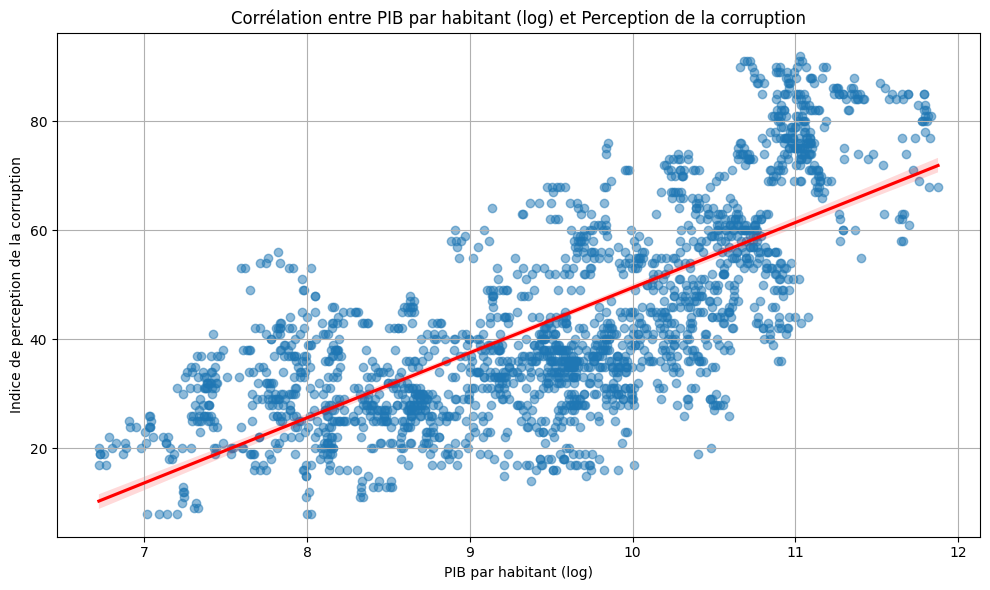

In [53]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='log_gdp_per_capita',
    y='corruption_index',
    data=df_clean,
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red'}
)
plt.title("Corrélation entre PIB par habitant (log) et Perception de la corruption")
plt.xlabel("PIB par habitant (log)")
plt.ylabel("Indice de perception de la corruption")
plt.grid(True)
plt.tight_layout()
plt.show()


* plus le log(PIB/habitant) est élevé, plus l’indice de perception de la corruption est élevé.
* Plus un pays est riche, plus il est perçu comme étant peu corrompu

### Corrélation de Pearson 

La corrélation de Pearson est une mesure qui permet de quantifier la force et la direction de la relation linéaire entre deux variables numériques, c'est un nombre entre -1 et 1 ( 1 corrélation parfaitement positive , -1 corrélation parfaitement négative , pas de corrélation linéaire).

ça mesure si les deux variables évoluent ensemble (dans le même ou dans le sens opposé).

In [54]:
corr, pval = pearsonr(df_clean['log_gdp_per_capita'], df_clean['corruption_index'])
print(f"Corrélation de Pearson : {corr:.3f}")
print(f"P-value associée : {pval:.4f}")

Corrélation de Pearson : 0.729
P-value associée : 0.0000


* 0.729 = corrélation positive forte
* Cela signifie que quand le PIB par habitant augmente, l’indice de perception de la corruption augmente aussi
* Et comme un indice plus élevé = moins de corruption perçue, cela confirme bien :
  #### Les pays plus riches sont perçus comme moins corrompus.

### Régression linéaire

In [55]:
X = sm.add_constant(df_clean['log_gdp_per_capita'])
y = df_clean['corruption_index']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       corruption_index   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2324.
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:11:21   Log-Likelihood:                -8142.6
No. Observations:                2045   AIC:                         1.629e+04
Df Residuals:                    2043   BIC:                         1.630e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -69.8655      2

### K-means

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Étape 1 : Sélection des variables pour le clustering
features = ['log_gdp_per_capita', 'corruption_index', 'hdi']
X = df_clean[features]

# Étape 2 : Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Étape 3 : K-means avec 3 clusters (modifiable)
kmeans = KMeans(n_clusters=3, random_state=0)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values